# Fixed time stepping of Ariane for particle tracks Baffin Bay

date: 2019-02-12

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import (
    nc_tools,
    viz_tools,
)
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
import matplotlib.cm as cm
import matplotlib
from matplotlib import colors
import numpy.ma as ma
from matplotlib.patches import Path, PathPatch
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/ocean/brogalla/GEOTRACES/analysis-birgit/cmocean-master/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [29]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
mask = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask.nc')
tmask = mask.variables['tmask']
tmask = np.array(tmask[:,:,:])
mlons = mask.variables['nav_lon']
mlats = mask.variables['nav_lat']
mlons = np.array(mlons)
mlats = np.array(mlats)
cond = (tmask > 0.1) 
deptht= np.array(mask.variables['nav_lev'])
Z_masked = np.ma.masked_where(cond, tmask) 

In [3]:
BB = nc.Dataset('/ocean/brogalla/GEOTRACES/Ariane/final_tracks/trajecs/2011-2015.nc')
initx_BB = BB.variables['init_x']
inity_BB = BB.variables['init_y']
initz_BB = BB.variables['init_z']
lon_BB = BB.variables['traj_lon']
lat_BB = BB.variables['traj_lat']
depth_BB = BB.variables['traj_depth']
    
initx_BB = np.array(initx_BB)
inity_BB = np.array(inity_BB)
initz_BB = np.array(initz_BB)
lon_BB = np.array(lon_BB)   
lat_BB = np.array(lat_BB)
depth_BB = np.array(depth_BB)

### Group based on stations: (should be 3)

In [4]:
initx_BB.shape

(407,)

In [5]:
inix = initx_BB
stn = np.zeros(initx_BB.shape)
for i in range(0,len(inix)):
    if np.abs(inix[i]-560) < 10:
        stn[i] = 1
    elif np.abs(inix[i]-570) < 10:
        stn[i] = 2
    else:
        stn[i] = 3

In [6]:
iniz = initz_BB
group_depth = np.zeros(initz_BB.shape)

for i in range(0,len(iniz)):
    if iniz[i] == 23:
        group_depth[i] = 131
    elif iniz[i] == 24:
        group_depth[i] = 156
    elif iniz[i] == 25:
        group_depth[i] = 186
    elif iniz[i] == 26:
        group_depth[i] = 222
    elif iniz[i] == 27:
        group_depth[i] = 266
    elif iniz[i] == 28:
        group_depth[i] = 318
    elif iniz[i] == 29:
        group_depth[i] = 380
    elif iniz[i] == 30:
        group_depth[i] = 454
    elif iniz[i] == 31:
        group_depth[i] = 541
    elif iniz[i] == 32:
        group_depth[i] = 643
    elif iniz[i] == 33:
        group_depth[i] = 763
    elif iniz[i] == 34:
        group_depth[i] = 902
    else:
        group_depth[i] = 0

In [7]:
depth_classes = [186,222,266,318,380,454,541,643,763]

In [19]:
def plot_all(station, traj_lon=lon_BB, traj_lat=lat_BB, depth_classes=depth_classes, group_depth=group_depth):
    fig, ax = plt.subplots(9,5, figsize=(18,30))

    for depth in depth_classes:
        print(depth)
        lon1 = traj_lon[:, np.logical_and(group_depth == depth,stn == station)]
        lat1 = traj_lat[:, np.logical_and(group_depth == depth,stn == station)]
        
        for run in range(0,9):
            proj1=Basemap(projection='eqdc',lat_0 = 72, lon_0 = -55, resolution='l', \
                          width=2.1e6, height=2.1e6, ax=ax[run, 0])
            proj1.drawlsmask(land_color = "#8b7765",resolution = 'l')
            proj2=Basemap(projection='eqdc',lat_0 = 72, lon_0 = -55, resolution='l', \
                          width=2.1e6, height=2.1e6, ax=ax[run, 1])
            proj2.drawlsmask(land_color = "#8b7765",resolution = 'l')
            proj3=Basemap(projection='eqdc',lat_0 = 72, lon_0 = -55, resolution='l', \
                          width=2.1e6, height=2.1e6, ax=ax[run, 2])
            proj3.drawlsmask(land_color = "#8b7765",resolution = 'l')
            proj4=Basemap(projection='eqdc',lat_0 = 72, lon_0 = -55, resolution='l', \
                          width=2.1e6, height=2.1e6, ax=ax[run, 3])
            proj4.drawlsmask(land_color = "#8b7765",resolution = 'l')
            proj5=Basemap(projection='eqdc',lat_0 = 72, lon_0 = -55, resolution='l', \
                          width=2.1e6, height=2.1e6, ax=ax[run, 4])
            proj5.drawlsmask(land_color = "#8b7765",resolution = 'l')
            
            x, y = proj1(lon1[:,run], lat1[:,run])
            x_sta,y_sta = proj1(lon1[0,0],lat1[0,0])
            if depth < 200:
                ax[run, 0].scatter(x, y, zorder=2, s=2, label=str(depth))
                ax[run, 0].legend(fontsize=14)
                ax[run, 0].scatter(x_sta,y_sta, s=100, zorder=3, marker='*', c='k')
            elif 200 < depth < 300:
                ax[run, 1].scatter(x, y, zorder=2, s=2, label=str(depth))
                ax[run, 1].legend(fontsize=14)
                ax[run, 1].scatter(x_sta,y_sta, s=100, zorder=3, marker='*', c='k')
            elif 300 < depth < 400:
                ax[run, 2].scatter(x, y, zorder=2, s=2, label=str(depth))
                ax[run, 2].legend(fontsize=14)
                ax[run, 2].scatter(x_sta,y_sta, s=100, zorder=3, marker='*', c='k')
            elif 400 < depth < 600:
                ax[run, 3].scatter(x, y, zorder=2, s=2, label=str(depth))
                ax[run, 3].legend(fontsize=14)
                ax[run, 3].scatter(x_sta,y_sta, s=100, zorder=3, marker='*', c='k')
            elif 600 < depth < 800:
                ax[run, 4].scatter(x, y, zorder=2, s=2, label=str(depth)) 
                ax[run, 4].legend(fontsize=14)
                ax[run, 4].scatter(x_sta,y_sta, s=100, zorder=3, marker='*', c='k')
                
    fig.suptitle('BB'+str(station), x=0.515, y=.85, fontsize=16)
#     fig.savefig(filename, bbox_inches='tight')
    return fig

186
222
266
318
380
454
541
643
763


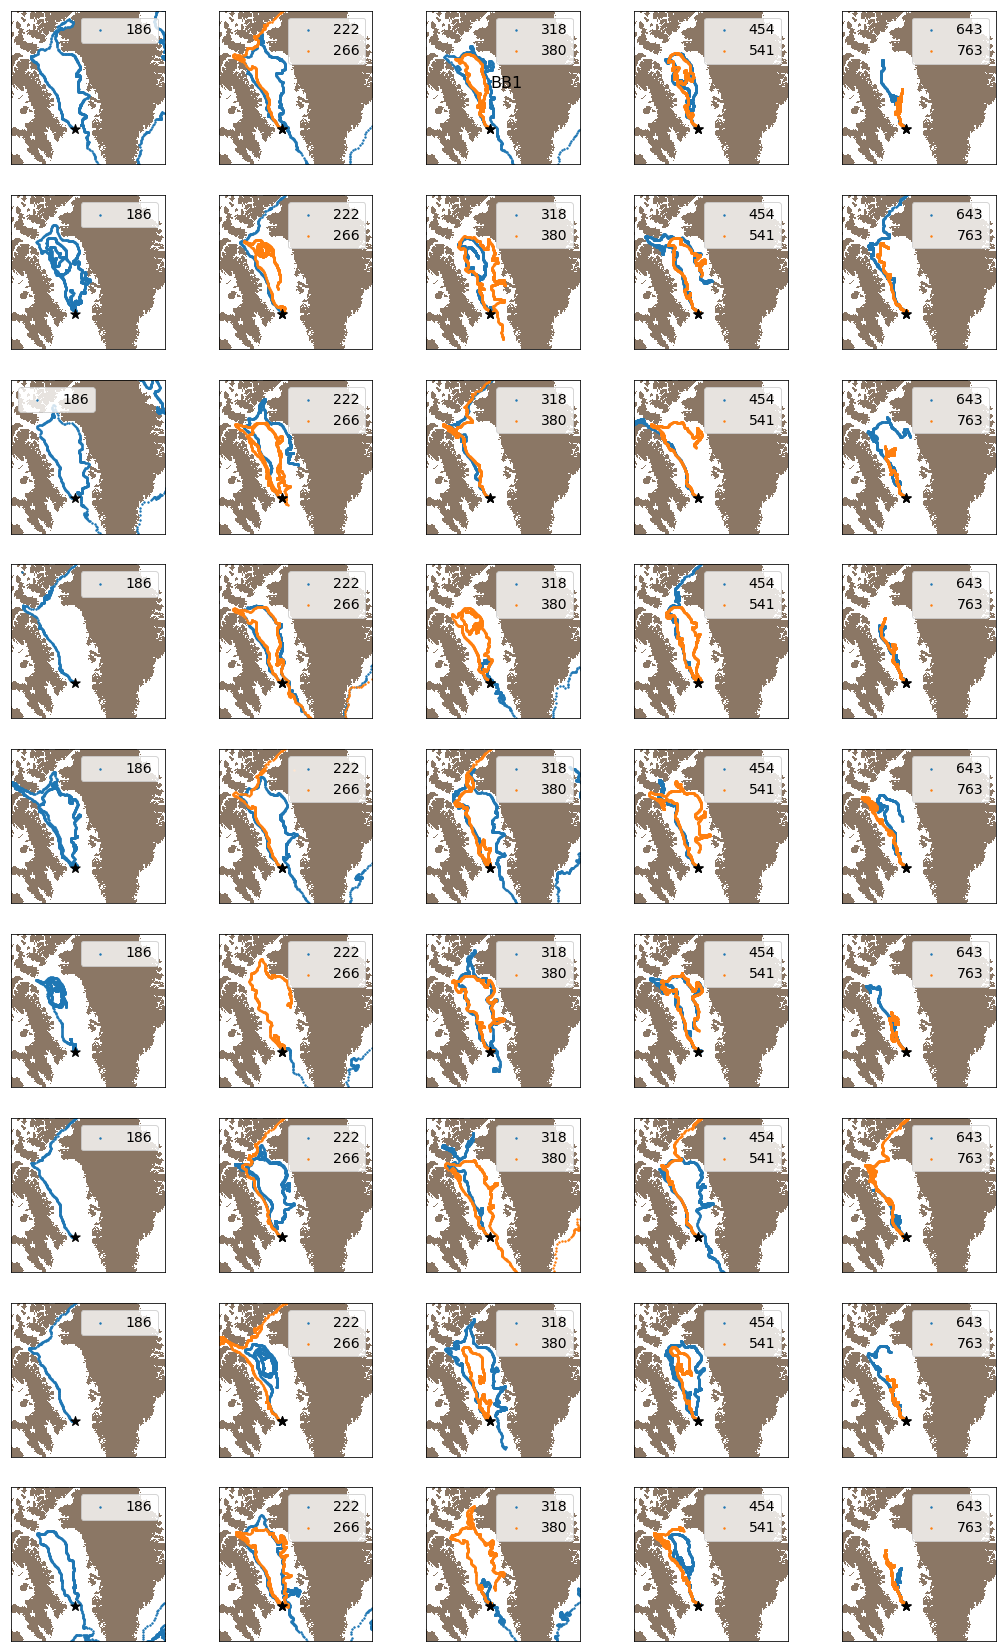

In [20]:
fig1 = plot_all(1)

186
222
266
318
380
454
541
643
763


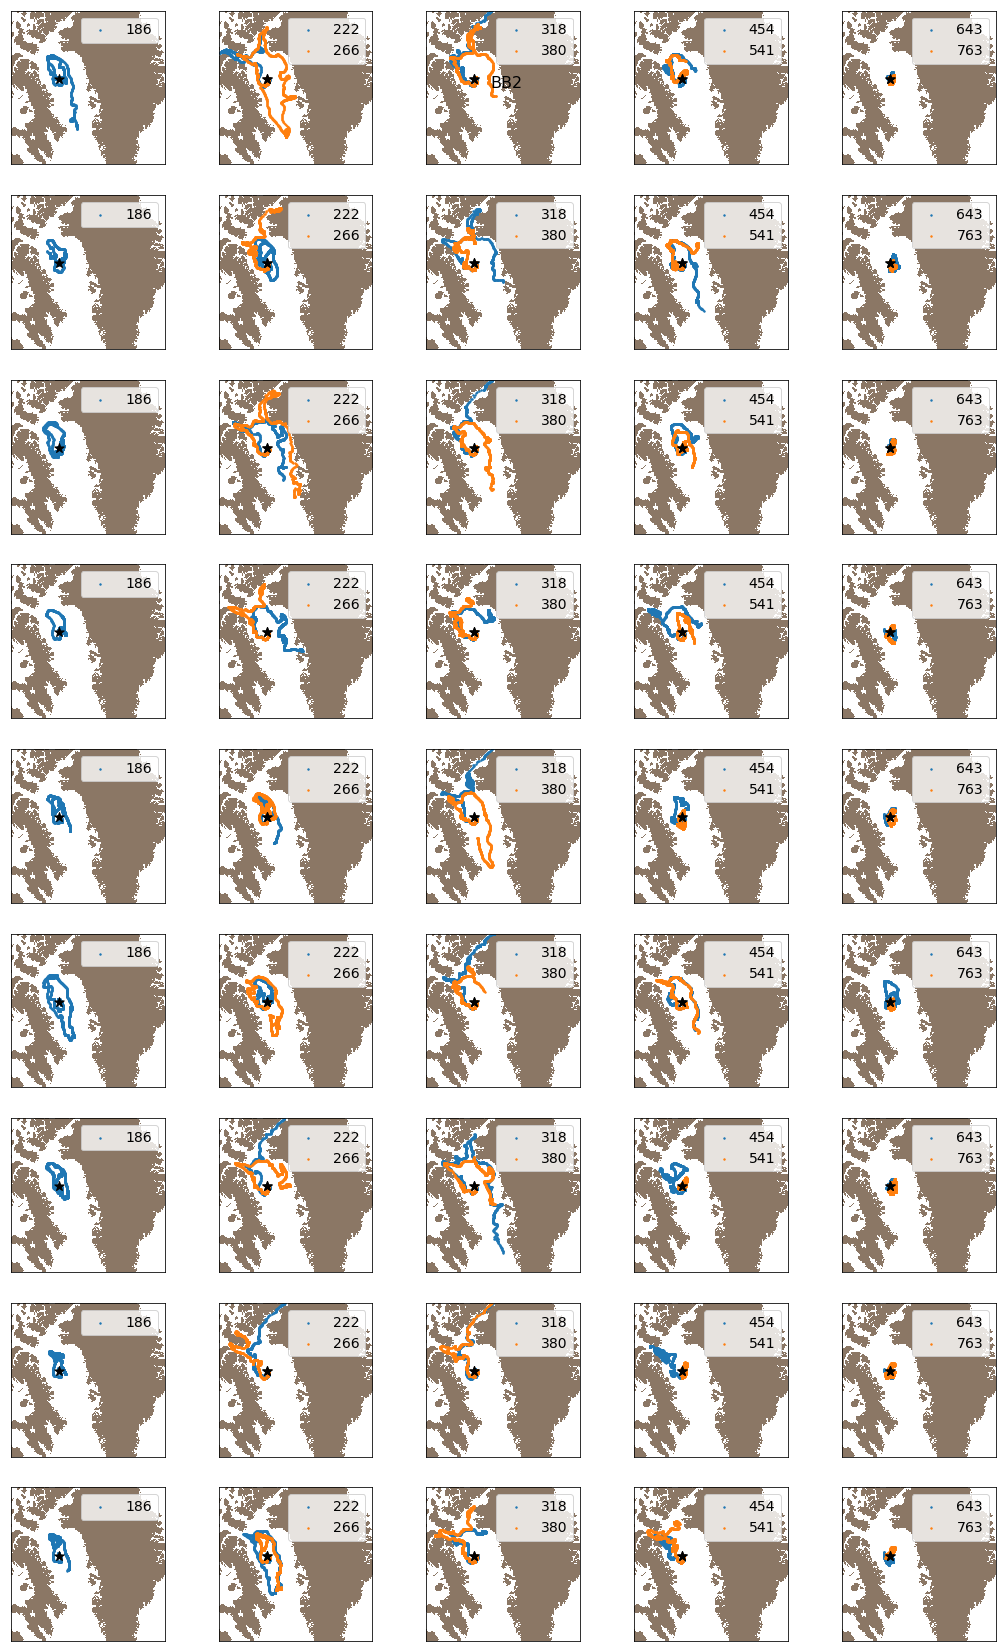

In [21]:
fig2 = plot_all(2)

186
222
266
318
380
454
541
643
763


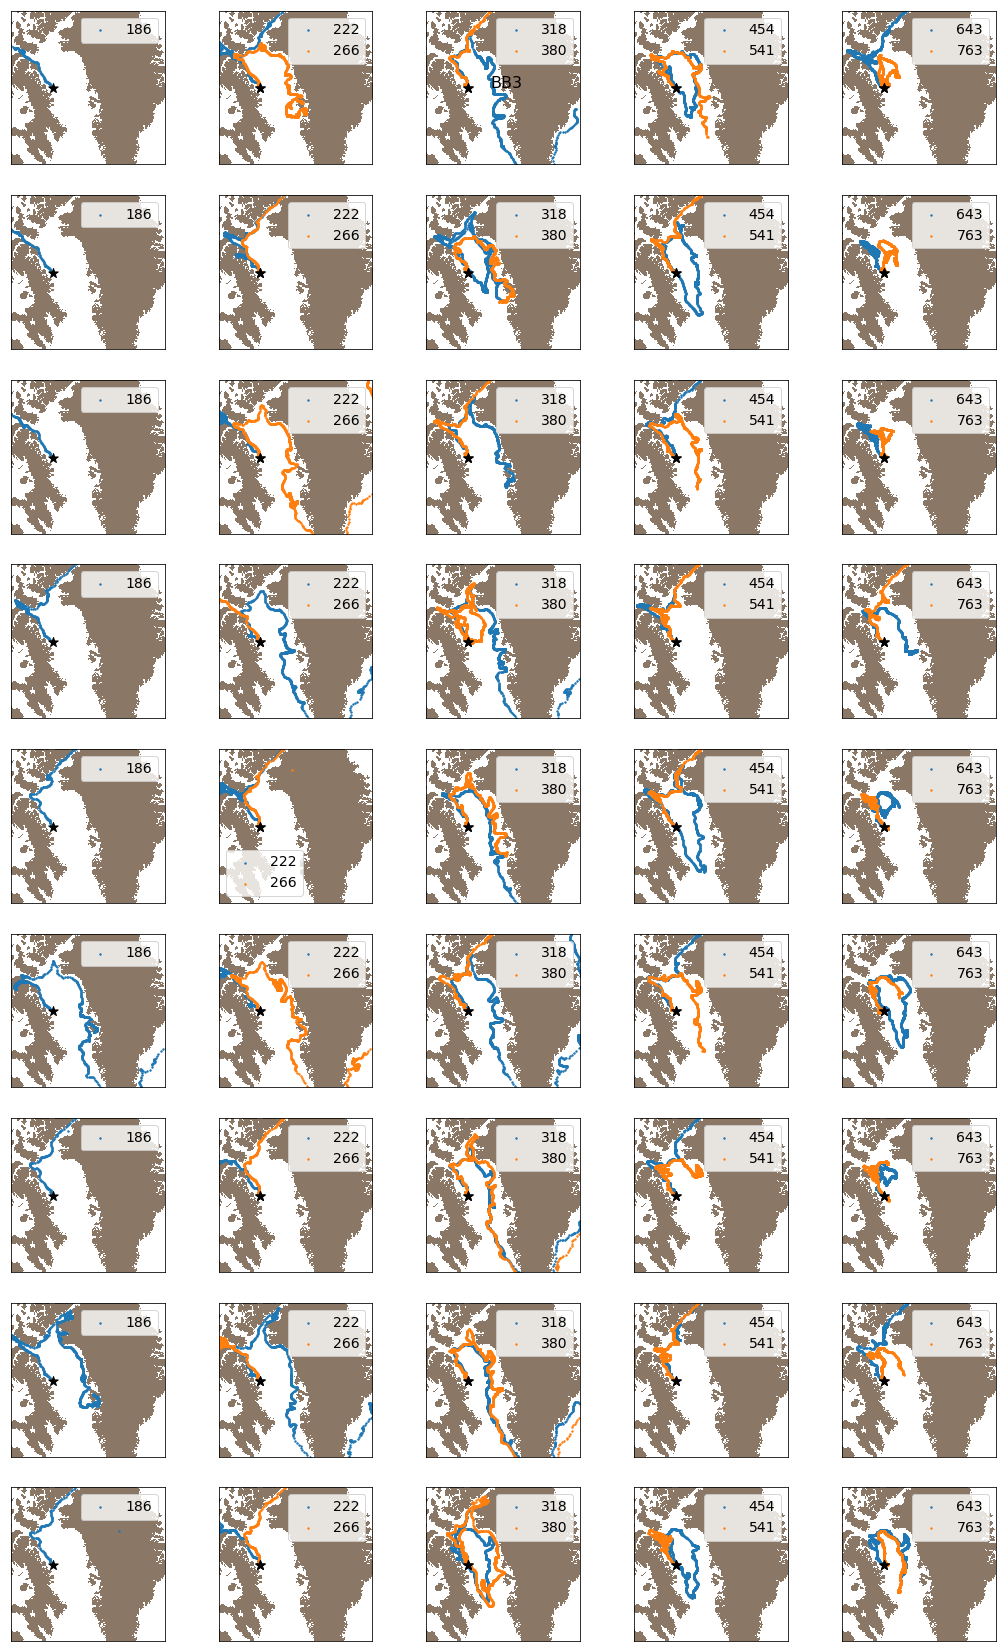

In [22]:
fig3 = plot_all(3)

In [23]:
pp = PdfPages('20110105-20150808.pdf')
pp.savefig(fig1)
pp.savefig(fig2)
pp.savefig(fig3)
pp.close()

### Show that 0-450 m waters mostly originate from the East Greenland Current at all stations:

In [9]:
def plots_by_depth(proj, ax, lons, lats, stn):
    for i in range(0,len(lons[0,:])):
        lon = lons[:,i]
        lat = lats[:,i]
        x, y = proj(lon, lat)
        ax.scatter(x, y, zorder=2, s=2, color='#606060')
    
    x_sta,y_sta = proj(lons[0,0],lats[0,0])
    ax.scatter(x_sta,y_sta, s=100, zorder=3, marker='*', c='r')
    return

In [10]:
def combine_plots_by_depth(proj1, ax, depth, \
                           group_depth=group_depth, stn=stn, traj_lon=lon_BB, traj_lat=lat_BB):
    ax1 = ax[0]
    ax2 = ax[1]
    ax3 = ax[2]
    
    lon1 = traj_lon[:, np.logical_and(group_depth == depth,stn == 1)]
    lat1 = traj_lat[:, np.logical_and(group_depth == depth,stn == 1)]
    lon2 = traj_lon[:, np.logical_and(group_depth == depth,stn == 2)]
    lat2 = traj_lat[:, np.logical_and(group_depth == depth,stn == 2)]
    lon3 = traj_lon[:, np.logical_and(group_depth == depth,stn == 3)]
    lat3 = traj_lat[:, np.logical_and(group_depth == depth,stn == 3)]

#     print(sum(np.logical_and(group_depth == depth,stn == 1)))
#     print(sum(np.logical_and(group_depth == depth,stn == 2)))
#     print(sum(np.logical_and(group_depth == depth,stn == 3)))
    plots_by_depth(proj1, ax1, lon1, lat1, 'BB1')
    plots_by_depth(proj1, ax2, lon2, lat2, 'BB2')
    plots_by_depth(proj1, ax3, lon3, lat3, 'BB3')
    return

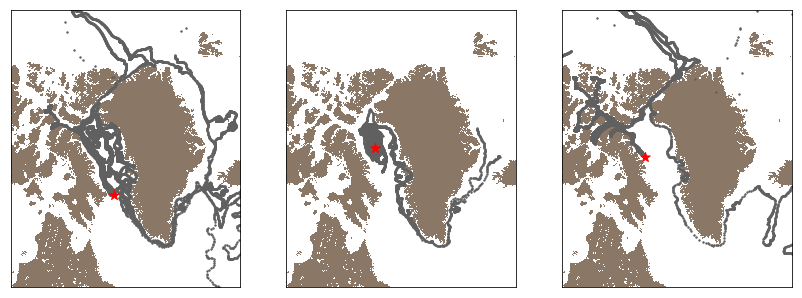

In [145]:
fig, ax = plt.subplots(1,3, figsize=(14,10))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'i')

combine_plots_by_depth(proj1, ax, 131)

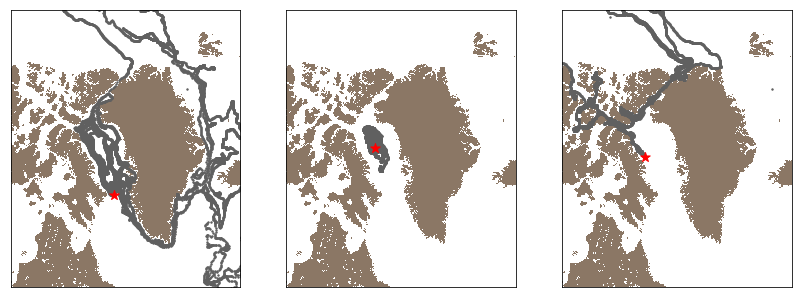

In [139]:
fig, ax = plt.subplots(1,3, figsize=(14,10))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'i')

combine_plots_by_depth(proj1, ax, 156)

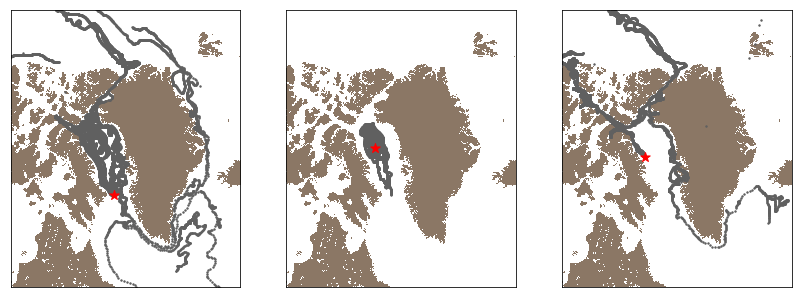

In [108]:
fig, ax = plt.subplots(1,3, figsize=(14,10))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'i')

combine_plots_by_depth(proj1, ax, 186)

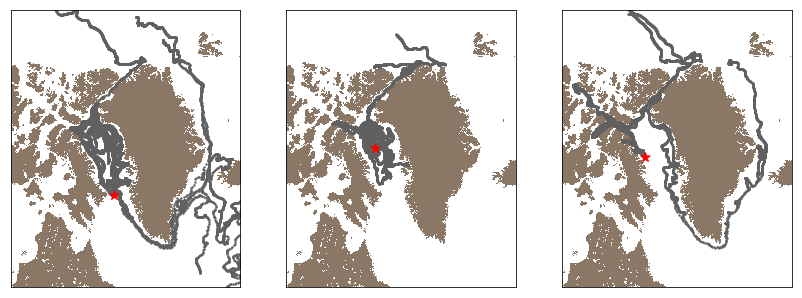

In [109]:
fig, ax = plt.subplots(1,3, figsize=(14,10))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'i')

combine_plots_by_depth(proj1, ax, 222)

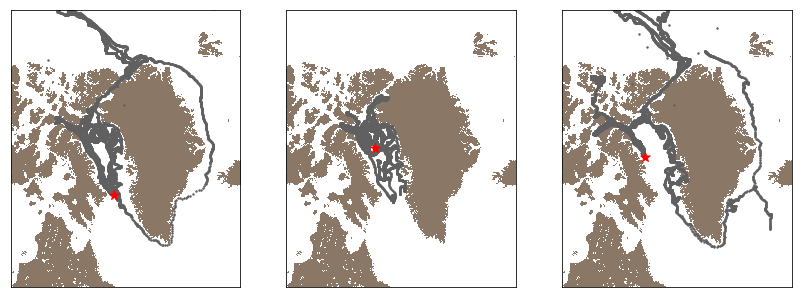

In [110]:
fig, ax = plt.subplots(1,3, figsize=(14,10))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'i')

combine_plots_by_depth(proj1, ax, 266)

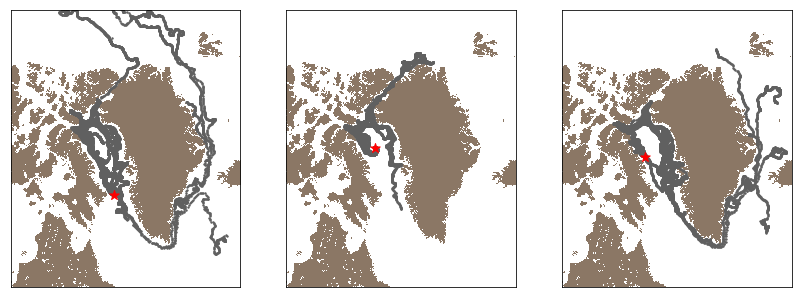

In [111]:
fig, ax = plt.subplots(1,3, figsize=(14,10))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'i')

combine_plots_by_depth(proj1, ax, 318)

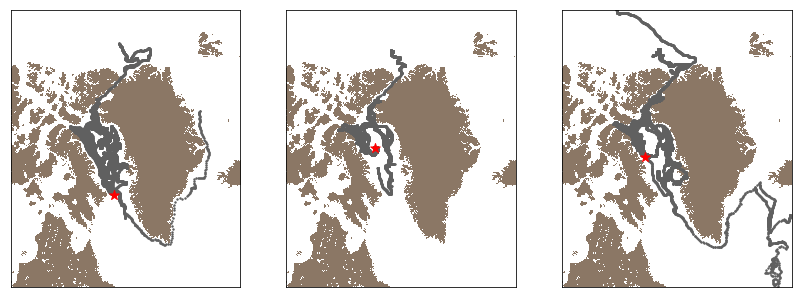

In [112]:
fig, ax = plt.subplots(1,3, figsize=(14,10))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'i')

combine_plots_by_depth(proj1, ax, 380)

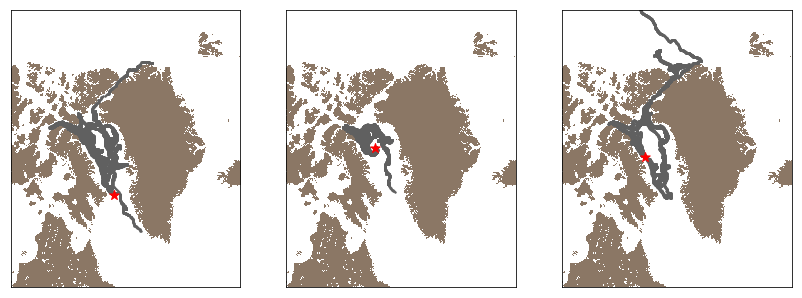

In [114]:
fig, ax = plt.subplots(1,3, figsize=(14,10))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'i')

combine_plots_by_depth(proj1, ax, 454)

### Show that the waters deeper than 450 m come from the North Subarctic Atlantic

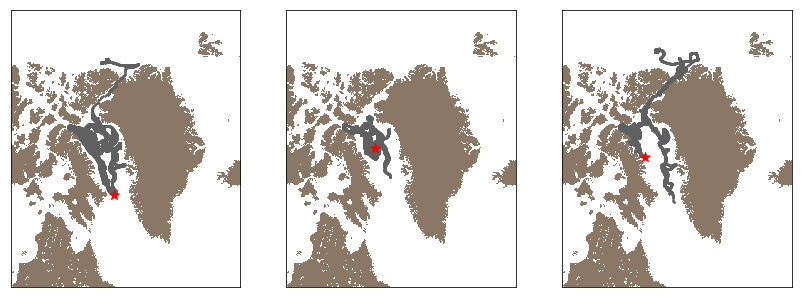

In [115]:
fig, ax = plt.subplots(1,3, figsize=(14,10))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'i')

combine_plots_by_depth(proj1, ax, 541)

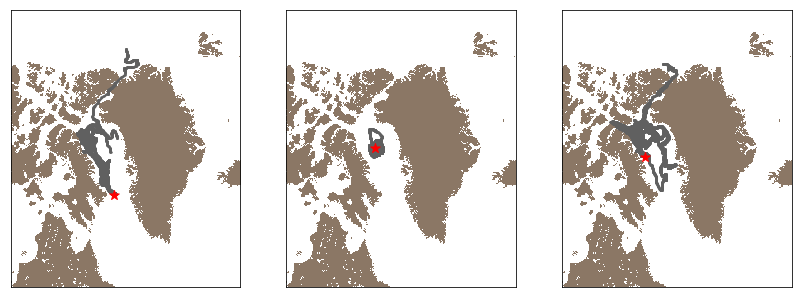

In [120]:
fig, ax = plt.subplots(1,3, figsize=(14,10))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'i')

combine_plots_by_depth(proj1, ax, 643)

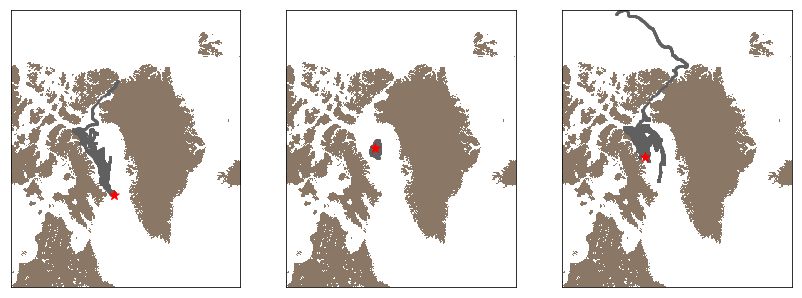

In [121]:
fig, ax = plt.subplots(1,3, figsize=(14,10))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'i')

combine_plots_by_depth(proj1, ax, 763)

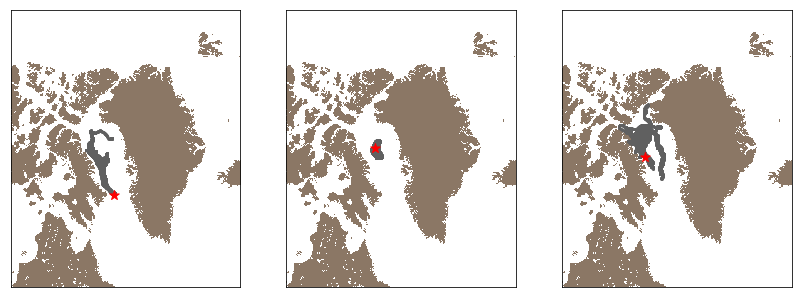

In [125]:
fig, ax = plt.subplots(1,3, figsize=(14,10))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'i')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', width=3.4e6, height=4.1e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'i')

combine_plots_by_depth(proj1, ax, 902)

# Classifications:

In [8]:
BB31 = [3,2,1,1,2,4,5,2,4]
BB32 = [3,2,2,1,5,1,2,4,4]
BB33 = [3,3,1,1,2,2,1,4,4]
BB34 = [2,1,3,1,1,2,2,5,2]
BB35 = [2,2,2,1,1,1,2,4,4]
BB36 = [1,3,1,1,2,2,5,4,5]
BB37 = [2,3,2,1,1,2,5,4,4]
BB38 = [1,1,3,5,1,2,2,2,4]
BB39 = [2,3,2,4,1,4,4,5,4]
BB3_class = np.ma.transpose(np.stack((BB31, BB32, BB33, BB34, BB35, BB36, BB37, BB38, BB39)))

In [9]:
BB11 = [1,1,2,5,4,4,4,4,4]
BB12 = [1,2,4,4,5,5,5,2,4]
BB13 = [1,1,4,2,2,3,5,5,4]
BB14 = [2,5,5,6,4,2,4,4,4]
BB15 = [1,1,2,1,2,2,1,4,4]
BB16 = [4,6,1,1,5,1,5,4,4]
BB17 = [2,1,2,1,5,5,2,4,2]
BB18 = [2,4,2,1,4,4,4,4,4]
BB19 = [5,1,5,6,1,4,5,4,4]
BB1_class = np.ma.transpose(np.stack((BB11, BB12, BB13, BB14, BB15, BB16, BB17, BB18, BB19)))

In [10]:
BB3_class_sums = np.zeros((3,5)) 
for classi in range(1,6):
    b1=0
    for j in range(0, 3):
        a1 = sum([i == classi for i in BB3_class[j,:]])
        b1 += a1
    BB3_class_sums[0,classi-1] = b1
    
    b2 = 0
    for j in range(3, 6):
        a2 = sum([i == classi for i in BB3_class[j,:]])
        b2 += a2
    BB3_class_sums[1,classi-1] = b2
    
    b3 = 0
    for j in range(6, 9):
        a3 = sum([i == classi for i in BB3_class[j,:]])
        b3 += a3
    BB3_class_sums[2,classi-1] = b3
    
BB3_class_sums = BB3_class_sums.astype(int)

In [11]:
BB1_class_sums = np.zeros((3,6)) 
for classi in range(1,7):
    b1=0
    for j in range(0, 3):
        a1 = sum([i == classi for i in BB1_class[j,:]])
        b1 += a1
    BB1_class_sums[0,classi-1] = b1
    
    b2 = 0
    for j in range(3, 6):
        a2 = sum([i == classi for i in BB1_class[j,:]])
        b2 += a2
    BB1_class_sums[1,classi-1] = b2
    
    b3 = 0
    for j in range(6, 9):
        a3 = sum([i == classi for i in BB1_class[j,:]])
        b3 += a3
    BB1_class_sums[2,classi-1] = b3
    
BB1_class_sums = BB1_class_sums.astype(int)

In [12]:
colors = ['#029c7a', '#15c3d3', '#086b8a', '#ffcc5c', '#96c95c', '#2c6936']

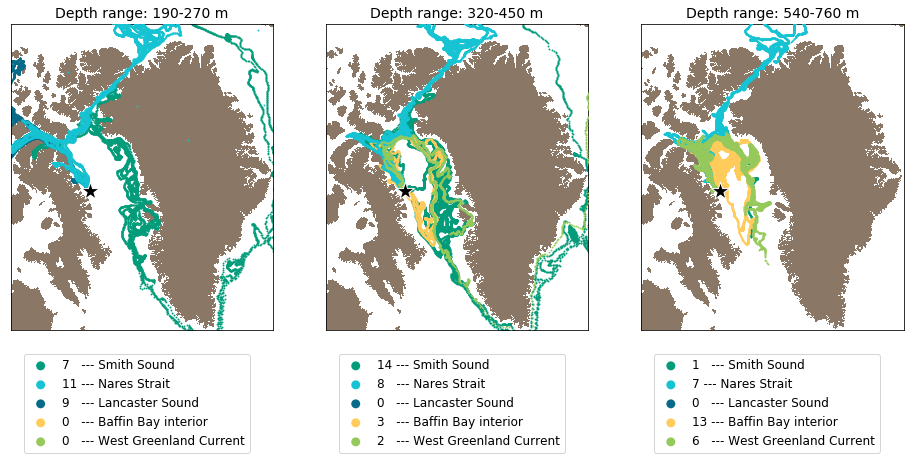

In [13]:
fig, ax = plt.subplots(1,3, figsize=(16,10))

zorders = [1, 3, 2, 2, 4]

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', \
                      width=2.4e6, height=2.8e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'l')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', \
                      width=2.4e6, height=2.8e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'l')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', \
                      width=2.4e6, height=2.8e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'l')

i=0
for depth in depth_classes:
    lon1 = lon_BB[:, np.logical_and(group_depth == depth,stn == 3)]
    lat1 = lat_BB[:, np.logical_and(group_depth == depth,stn == 3)]
    
    for run in range(0,9): 
        lon = lon1[:,run]
        lat = lat1[:,run]
        x, y = proj1(lon, lat)
        index_class = BB3_class[i,run]
        if i < 3:
            ax[0].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1]) 
        elif i > 5:
            ax[2].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1]) 
        else:
            ax[1].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1])
    i+=1
    
x_sta,y_sta = proj1(lon1[0,0],lat1[0,0])
ax[0].scatter(x_sta,y_sta, s=350, zorder=5, marker='*', c='k', edgecolors='white')
ax[0].set_title('Depth range: 190-270 m', fontsize=14)
ax[1].scatter(x_sta,y_sta, s=350, zorder=5, marker='*', c='k', edgecolors='white')
ax[1].set_title('Depth range: 320-450 m', fontsize=14)
ax[2].scatter(x_sta,y_sta, s=350, zorder=5, marker='*', c='k', edgecolors='white')
ax[2].set_title('Depth range: 540-760 m', fontsize=14)

c1 = ax[2].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[0], edgecolors='none')
c2 = ax[2].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[1], edgecolors='none')
c3 = ax[2].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[2], edgecolors='none')
c4 = ax[2].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[3], edgecolors='none')
c5 = ax[2].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[4], edgecolors='none')

ax[0].legend((c1, c2, c3, c4, c5), (str(BB3_class_sums[0,0]) + '   --- Smith Sound', \
                                    str(BB3_class_sums[0,1]) + ' --- Nares Strait', \
                                    str(BB3_class_sums[0,2]) + '   --- Lancaster Sound', \
                                    str(BB3_class_sums[0,3]) + '   --- Baffin Bay interior', \
                                    str(BB3_class_sums[0,4]) + '   --- West Greenland Current'), \
             loc = (0.05, -0.40), markerscale=10, fontsize=12)
ax[1].legend((c1, c2, c3, c4, c5), (str(BB3_class_sums[1,0]) + ' --- Smith Sound', \
                                    str(BB3_class_sums[1,1]) + '   --- Nares Strait', \
                                    str(BB3_class_sums[1,2]) + '   --- Lancaster Sound', \
                                    str(BB3_class_sums[1,3]) + '   --- Baffin Bay interior', \
                                    str(BB3_class_sums[1,4]) + '   --- West Greenland Current'), \
             loc = (0.05, -0.40), markerscale=10, fontsize=12)
ax[2].legend((c1, c2, c3, c4, c5), (str(BB3_class_sums[2,0]) + '   --- Smith Sound', \
                                    str(BB3_class_sums[2,1]) + ' --- Nares Strait', \
                                    str(BB3_class_sums[2,2]) + '   --- Lancaster Sound', \
                                    str(BB3_class_sums[2,3]) + ' --- Baffin Bay interior', \
                                    str(BB3_class_sums[2,4]) + '   --- West Greenland Current'), \
             loc = (0.05, -0.40), markerscale=10, fontsize=12)

fig.savefig('BB3-tracks_20150808.png',bbox_inches='tight')

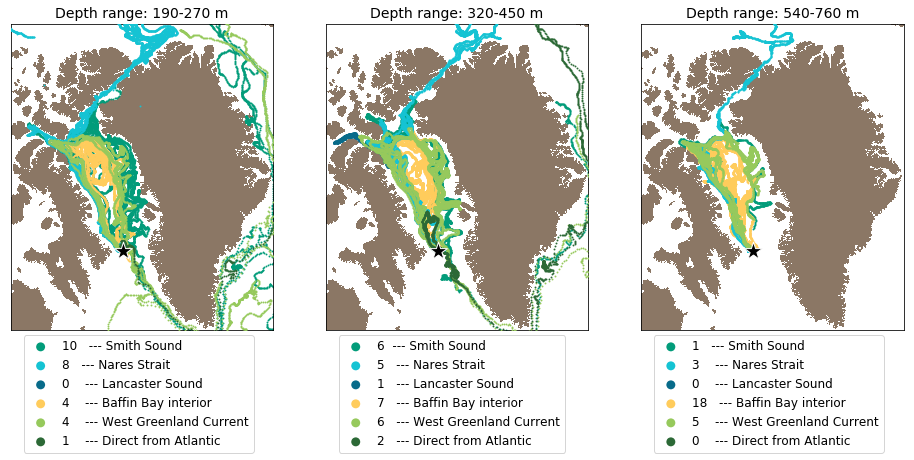

In [14]:
fig, ax = plt.subplots(1,3, figsize=(16,10))

zorders = [1, 3, 2, 2, 4, 5]

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', \
                      width=2.4e6, height=2.8e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'l')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', \
                      width=2.4e6, height=2.8e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'l')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', \
                      width=2.4e6, height=2.8e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'l')

i=0
for depth in depth_classes:
    lon1 = lon_BB[:, np.logical_and(group_depth == depth,stn == 1)]
    lat1 = lat_BB[:, np.logical_and(group_depth == depth,stn == 1)]
    
    for run in range(0,9): 
        lon = lon1[:,run]
        lat = lat1[:,run]
        x, y = proj1(lon, lat)
        index_class = BB1_class[i,run]
        if i < 3:
            ax[0].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1]) 
        elif i > 5:
            ax[2].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1]) 
        else:
            ax[1].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1])
    i+=1
    
x_sta,y_sta = proj1(lon1[0,0],lat1[0,0])
ax[0].scatter(x_sta,y_sta, s=350, zorder=5, marker='*', c='k', edgecolors='white')
ax[0].set_title('Depth range: 190-270 m', fontsize=14)
ax[1].scatter(x_sta,y_sta, s=350, zorder=5, marker='*', c='k', edgecolors='white')
ax[1].set_title('Depth range: 320-450 m', fontsize=14)
ax[2].scatter(x_sta,y_sta, s=350, zorder=5, marker='*', c='k', edgecolors='white')
ax[2].set_title('Depth range: 540-760 m', fontsize=14)

c1 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[0], edgecolors='none')
c2 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[1], edgecolors='none')
c3 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[2], edgecolors='none')
c4 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[3], edgecolors='none')
c5 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[4], edgecolors='none')
c6 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[5], edgecolors='none')

ax[0].legend((c1, c2, c3, c4, c5, c6), (str(BB1_class_sums[0,0]) + '   --- Smith Sound', \
                                    str(BB1_class_sums[0,1]) + '   --- Nares Strait', \
                                    str(BB1_class_sums[0,2]) + '    --- Lancaster Sound', \
                                    str(BB1_class_sums[0,3]) + '    --- Baffin Bay interior', \
                                    str(BB1_class_sums[0,4]) + '    --- West Greenland Current', \
                                    str(BB1_class_sums[0,5]) + '    --- Direct from Atlantic'), \
             loc = (0.05, -0.40), markerscale=10, fontsize=12)
ax[1].legend((c1, c2, c3, c4, c5, c6), (str(BB1_class_sums[1,0]) + '  --- Smith Sound', \
                                    str(BB1_class_sums[1,1]) + '   --- Nares Strait', \
                                    str(BB1_class_sums[1,2]) + '   --- Lancaster Sound', \
                                    str(BB1_class_sums[1,3]) + '   --- Baffin Bay interior', \
                                    str(BB1_class_sums[1,4]) + '   --- West Greenland Current', \
                                    str(BB1_class_sums[1,5]) + '   --- Direct from Atlantic'), \
             loc = (0.05, -0.40), markerscale=10, fontsize=12)
ax[2].legend((c1, c2, c3, c4, c5, c6), (str(BB1_class_sums[2,0]) + '   --- Smith Sound', \
                                    str(BB1_class_sums[2,1]) + '    --- Nares Strait', \
                                    str(BB1_class_sums[2,2]) + '    --- Lancaster Sound', \
                                    str(BB1_class_sums[2,3]) + '   --- Baffin Bay interior', \
                                    str(BB1_class_sums[2,4]) + '    --- West Greenland Current', \
                                    str(BB1_class_sums[2,5]) + '    --- Direct from Atlantic'), \
             loc = (0.05, -0.40), markerscale=10, fontsize=12)

fig.savefig('BB1-tracks_20150808.png',bbox_inches='tight')

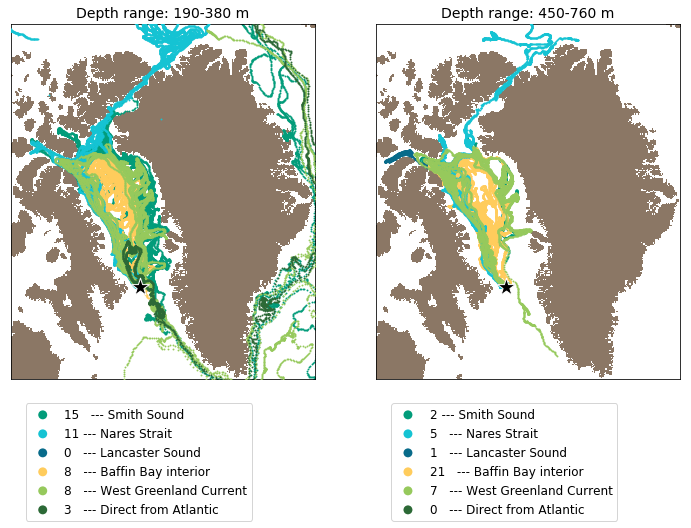

In [66]:
fig, ax = plt.subplots(1,2, figsize=(12,10))

zorders = [1, 3, 2, 2, 4, 5]

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', \
                      width=2.4e6, height=2.8e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'l')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', \
                      width=2.4e6, height=2.8e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'l')

i=0
for depth in depth_classes:
    lon1 = lon_BB[:, np.logical_and(group_depth == depth,stn == 1)]
    lat1 = lat_BB[:, np.logical_and(group_depth == depth,stn == 1)]
    
    for run in range(0,9): 
        lon = lon1[:,run]
        lat = lat1[:,run]
        x, y = proj1(lon, lat)
        index_class = BB1_class[i,run]
        if i < 5:
            ax[0].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1])  
        else:
            ax[1].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1])
    i+=1
    
x_sta,y_sta = proj1(lon1[0,0],lat1[0,0])
ax[0].scatter(x_sta,y_sta, s=350, zorder=6, marker='*', c='k', edgecolors='white')
ax[0].set_title('Depth range: 190-380 m', fontsize=14)
ax[1].scatter(x_sta,y_sta, s=350, zorder=6, marker='*', c='k', edgecolors='white')
ax[1].set_title('Depth range: 450-760 m', fontsize=14)

c1 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[0], edgecolors='none')
c2 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[1], edgecolors='none')
c3 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[2], edgecolors='none')
c4 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[3], edgecolors='none')
c5 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[4], edgecolors='none')
c6 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[5], edgecolors='none')

ax[0].legend((c1, c2, c3, c4, c5, c6), (str(BB1_class_sums[0,0]) + '   --- Smith Sound', \
                                    str(BB1_class_sums[0,1]) + ' --- Nares Strait', \
                                    str(BB1_class_sums[0,2]) + '   --- Lancaster Sound', \
                                    str(BB1_class_sums[0,3]) + '   --- Baffin Bay interior', \
                                    str(BB1_class_sums[0,4]) + '   --- West Greenland Current', \
                                    str(BB1_class_sums[0,5]) + '   --- Direct from Atlantic'), \
             loc = (0.05, -0.40), markerscale=10, fontsize=12)
ax[1].legend((c1, c2, c3, c4, c5, c6), (str(BB1_class_sums[1,0]) + ' --- Smith Sound', \
                                    str(BB1_class_sums[1,1]) + '   --- Nares Strait', \
                                    str(BB1_class_sums[1,2]) + '   --- Lancaster Sound', \
                                    str(BB1_class_sums[1,3]) + '   --- Baffin Bay interior', \
                                    str(BB1_class_sums[1,4]) + '   --- West Greenland Current', \
                                    str(BB1_class_sums[1,5]) + '   --- Direct from Atlantic'), \
             loc = (0.05, -0.40), markerscale=10, fontsize=12)

fig.savefig('BB1-tracks_12Feb2019.png',bbox_inches='tight')

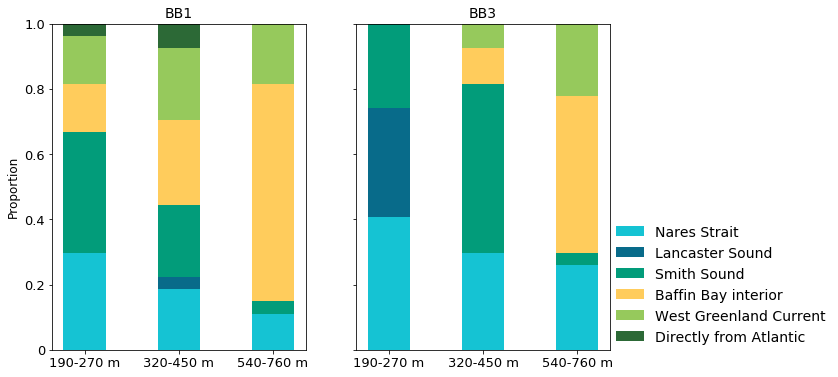

In [15]:
fig, (ax1, ax3) = plt.subplots(1,2,figsize=(10,6), gridspec_kw = {'width_ratios':[1, 1]})

class1_BB1 = (BB1_class_sums[0,0]/27, BB1_class_sums[1,0]/27, BB1_class_sums[2,0]/27)
class1_BB3 = (BB3_class_sums[0,0]/27, BB3_class_sums[1,0]/27, BB3_class_sums[2,0]/27)
class2_BB1 = (BB1_class_sums[0,1]/27, BB1_class_sums[1,1]/27, BB1_class_sums[2,1]/27)
class2_BB3 = (BB3_class_sums[0,1]/27, BB3_class_sums[1,1]/27, BB3_class_sums[2,1]/27)
class3_BB1 = (BB1_class_sums[0,2]/27, BB1_class_sums[1,2]/27, BB1_class_sums[2,2]/27)
class3_BB3 = (BB3_class_sums[0,2]/27, BB3_class_sums[1,2]/27, BB3_class_sums[2,2]/27)
class4_BB1 = (BB1_class_sums[0,3]/27, BB1_class_sums[1,3]/27, BB1_class_sums[2,3]/27)
class4_BB3 = (BB3_class_sums[0,3]/27, BB3_class_sums[1,3]/27, BB3_class_sums[2,3]/27)
class5_BB1 = (BB1_class_sums[0,4]/27, BB1_class_sums[1,4]/27, BB1_class_sums[2,4]/27)
class5_BB3 = (BB3_class_sums[0,4]/27, BB3_class_sums[1,4]/27, BB3_class_sums[2,4]/27)
class6_BB1 = (BB1_class_sums[0,5]/27, BB1_class_sums[1,5]/27, BB1_class_sums[2,5]/27)

N1 = 3
N3 = 3
ind1 = np.arange(N1) 
ind3 = np.arange(N3) 
width = 0.45

#BB1:
p1 = ax1.bar(ind1, class2_BB1, width, color=colors[1])
p2 = ax1.bar(ind1, class3_BB1, width, bottom=class2_BB1, color=colors[2])
p3 = ax1.bar(ind1, class1_BB1, width, bottom=np.add(class2_BB1, class3_BB1), color=colors[0])
p4 = ax1.bar(ind1, class4_BB1, width, bottom=np.add(np.add(class3_BB1, class2_BB1),class1_BB1), color=colors[3])
p5 = ax1.bar(ind1, class5_BB1, width, bottom=np.add(np.add(np.add(class4_BB1, class2_BB1), \
                                                             class1_BB1), class3_BB1), color=colors[4])
p6 = ax1.bar(ind1, class6_BB1, width, bottom=np.add(np.add(np.add(np.add(class4_BB1, class2_BB1), \
                                                                    class1_BB1), class3_BB1), class5_BB1),\
             color=colors[5])
#BB3:
ax3.bar(ind3, class2_BB3, width, color=colors[1])
ax3.bar(ind3, class3_BB3, width, bottom=class2_BB3, color=colors[2])
ax3.bar(ind3, class1_BB3, width, bottom=np.add(class2_BB3, class3_BB3), color=colors[0])
ax3.bar(ind3, class4_BB3, width, bottom=np.add(np.add(class3_BB3, class2_BB3), class1_BB3), color=colors[3])
ax3.bar(ind3, class5_BB3, width, bottom=np.add(np.add(np.add(class4_BB3, class2_BB3), \
                                                              class1_BB3), class3_BB3), color=colors[4])

ax1.set_ylabel('Proportion', fontsize=12)
ax1.set_xticks(ind1)
ax1.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0],fontsize=13)
ax1.set_xticklabels(['190-270 m', '320-450 m', '540-760 m'], fontsize=13)
ax1.set_title('BB1', fontsize=14)
ax3.set_xticks(ind3)
ax3.set_yticklabels([])
ax3.set_title('BB3', fontsize=14)
ax3.set_xticklabels(['190-270 m', '320-450 m', '540-760 m'], fontsize=13)

ax3.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Nares Strait','Lancaster Sound', 'Smith Sound',\
                                                 'Baffin Bay interior', 'West Greenland Current', \
                                                 'Directly from Atlantic'),\
           framealpha=0, fontsize=14, loc=(1,0))

fig.savefig('proportions_BB1-BB3_20150808.png',bbox_inches='tight')